## ANLY 590 - Homework #2

### 1. Feedforward: Building a ReLU neural network

### 1.1 Draw a network 

<img src="ffnn.jpeg" style="width: 400px;">

### 1.2 Mathematical equation

$y = v_1(max(0,w_11x_1+w_21x_2+b_1)) +v_2(max(0,w_12x_1+w_22x_2+b_2)) + v_3(max(0,w_13x_1+w_23x_2+b_3))+c$

### 1.3 Write a forward-pass function

In [2]:
from __future__ import division
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [368]:
def ReLU(z):
    s = max(0,z)
    return s

def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def ff_nn_ReLu(x,w,v,b,c):
    '''two dim input, one dim output'''
    l,_ = x.shape
    y = np.zeros((l))
    
    for i in range(l):
        x_i = x[i,:]
        # Setting up the hidden units
        h_1 = ReLU(a(x[i,:],w[:,0],b[0]))
        h_2 = ReLU(a(x[i,:],w[:,1],b[1]))
        h_3 = ReLU(a(x[i,:],w[:,2],b[2]))
        h = np.array([h_1,h_2,h_3])
        # Calculating the output
        y[i] = sigmoid(np.dot(h,v)+c)
    
    return np.array(y)


### 1.4 

In [369]:
w_1 = np.array([1,-1,0])
w_2 = np.array([0,0,0.5])
w = np.array([w_1,w_2])
v = np.array([1,0,-1])  
b = np.array([0,0,1])
c=1

In [370]:
x_1 = np.array([1,-1])
x_2 = np.array([0,-1])
x_3 = np.array([0,1])
x = np.array([x_1,x_2,x_3])

y = ff_nn_ReLu(x,w,v,b,c)
print(y)

[0.81757448 0.62245933 0.37754067]


### 2. Gradient Descent

$f(x,y) = (1-x^3)+100*(y^2-x)^2$

### 2.1 
Partial derivative of f with respect to x: 

$\frac{df}{dx} = -3x^2 + 200x - 200y^2$

Partial derivative of f with respect to y: 

$\frac{df}{dy} = 400y^3 - 400xy$

### 2.2

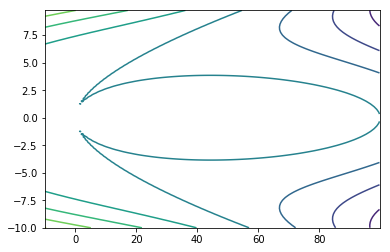

In [372]:
delta = 0.25
x = np.arange(-10.0, 100.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1 - X**3) + 100*(Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 2.3

In [373]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2+200*x-200*y**2
    df_dy = 400*y**3-400*x*y
    return np.array([df_dx, df_dy])

def grad_descent(starting_point= None, iterations=200, learning_rate=0.1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

Learning rate is  1e-06
Learning rate is  5e-06
Learning rate is  9e-06
Learning rate is  1e-05


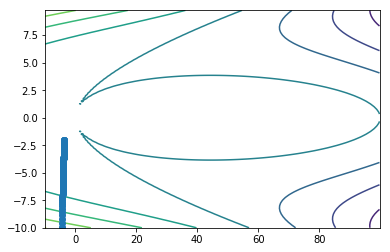

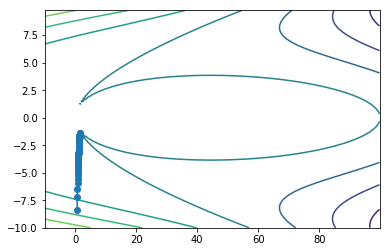

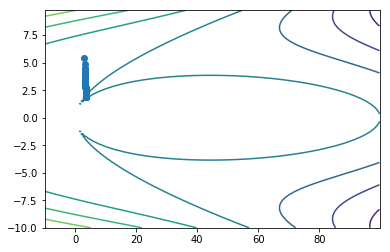

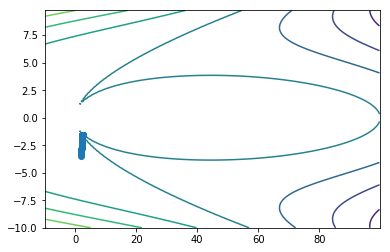

In [374]:
np.random.seed(145)
for i in [0.000001,0.000005,0.000009,0.00001]:
    traj = grad_descent(iterations=200, learning_rate=i)
    print("Learning rate is ", i)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

### 2.4

In [375]:
def grad_descent_with_momentum(starting_point=None, iterations=20, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

Learning rate is  1e-06 , alpha is  0.1
Learning rate is  1e-06 , alpha is  0.3
Learning rate is  1e-06 , alpha is  0.5
Learning rate is  5e-06 , alpha is  0.1
Learning rate is  5e-06 , alpha is  0.3
Learning rate is  5e-06 , alpha is  0.5


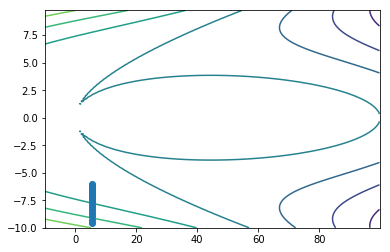

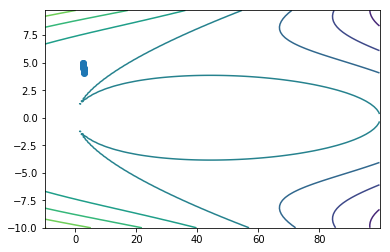

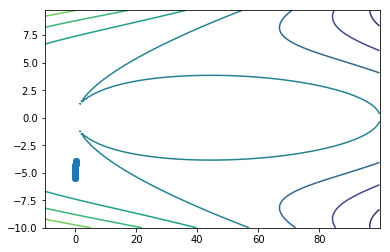

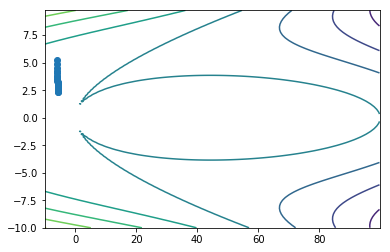

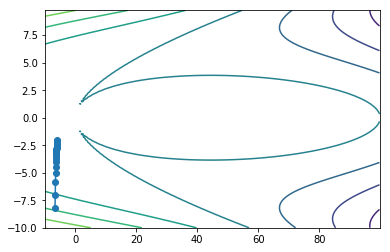

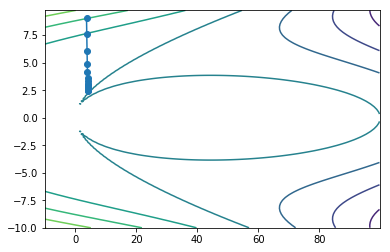

In [376]:
np.random.seed(10)
for i in [0.000001,0.000005]:
    for j in [0.1, 0.3, 0.5]:
        print("Learning rate is ", i, ", alpha is ", j)
        traj = grad_descent_with_momentum(iterations=20, epsilon=i, alpha=j)

        fig, ax = plt.subplots()
        CS = ax.contour(X, Y, Z)
        x= traj[:,0]
        y= traj[:,1]
        plt.plot(x,y,'-o')

### 3. Backprop

### 3.1

The gradient of loss function with respect to $w_{ij}$:


$\frac{\sigma{L}}{\sigma{w_{ij}}}$ = $(y-\hat{y})v_jx_iI(w_{1j}x_1+w_{2j}x_2+b_j>0)$



The gradient of loss function with repect to $v_j$:

$\frac{\sigma{L}}{\sigma{v_j}} = \frac{\sigma{L}}{\sigma{\hat{y}}}out_j = (y-\hat{y})ReLU(w_{1j}x_1+w_{2j}x_2+b_j)$

The gradient of loss function with respect to $w_{ij}$:



$\frac{\sigma{L}}{\sigma{b_{j}}}$ = $(y-\hat{y})v_jI(w_{1j}x_1+w_{2j}x_2+b_j>0)$




The gradient of loss function with respect to c:

$\frac{\sigma{L}}{\sigma{c}} = y-\hat{y}$

### 3.2 grad_f

In [3]:
def loss(y, y_hat):
    loss=[]
    for i in range(len(y)):
        loss.append(-y[i]*np.log(y_hat[i])-(1-y[i])*np.log(1-y_hat[i]))
    return np.average(loss)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def ReLU(x):
    return np.maximum(x,0)
    
def ReLU_derivative(x):
    if x>0:
        return 1
    else: 
        return 0

    
def yhat(x, coeffs):
    # returns model prediction 
    w11, w12, w13, w21, w22, w23, v1, v2, v3, b1, b2, b3, c = coeffs
    l,_= x.shape
    y = []
    for i in range(l):
        h1 = ReLU(x[i,0]*w11+x[i,1]*w21+b1)
        h2 = ReLU(x[i,0]*w12+x[i,1]*w22+b2)
        h3 = ReLU(x[i,0]*w13+x[i,1]*w23+b3)
        y_hat = sigmoid(v1*h1+v2*h2+v3*h3+c) 
        y.append(y_hat)
    return y

In [4]:
def grad_f(vector, x, y):
    """
    Computes local gradient vector for squared-error loss on OLS regression model cofficients
    """
    w11, w12, w13, w21, w22, w23, v1, v2, v3, b1, b2, b3, c = vector
    prediction = yhat(x, vector) 
    
    residuals = (y - prediction)
    
    l,_ = x.shape
    dL_dw11=[]
    dL_dw12=[]
    dL_dw13=[]
    dL_dw21=[]
    dL_dw22=[]
    dL_dw23=[]
    dL_dv1=[]
    dL_dv2=[]
    dL_dv3=[]
    dL_db1=[]
    dL_db2=[]
    dL_db3=[]
    for i in range(l):
        dL_dw11.append(-residuals[i]*v1*x[i,0]*ReLU_derivative(w11*x[i,0]+w21*x[i,1]+b1))
        dL_dw12.append(-residuals[i]*v2*x[i,0]*ReLU_derivative(w12*x[i,0]+w22*x[i,1]+b2))
        dL_dw13.append(-residuals[i]*v3*x[i,0]*ReLU_derivative(w13*x[i,0]+w23*x[i,1]+b3))

        dL_dw21.append(-residuals[i]*v1*x[i,0]*ReLU_derivative(w11*x[i,0]+w21*x[i,1]+b1))
        dL_dw22.append(-residuals[i]*v2*x[i,0]*ReLU_derivative(w12*x[i,0]+w22*x[i,1]+b2))
        dL_dw23.append(-residuals[i]*v3*x[i,0]*ReLU_derivative(w13*x[i,0]+w23*x[i,1]+b3))

        dL_dv1.append(-residuals[i]*ReLU(w11*x[i,0]+w21*x[i,1]+b1))
        dL_dv2.append(-residuals[i]*ReLU(w12*x[i,0]+w22*x[i,1]+b2))
        dL_dv3.append(-residuals[i]*ReLU(w13*x[i,0]+w23*x[i,1]+b3))
    
        dL_db1.append(-residuals[i]*v1*ReLU_derivative(w11*x[i,0]+w21*x[i,1]+b1))
        dL_db2.append(-residuals[i]*v2*ReLU_derivative(w12*x[i,0]+w22*x[i,1]+b2))
        dL_db3.append(-residuals[i]*v3*ReLU_derivative(w13*x[i,0]+w23*x[i,1]+b3))

    dL_dc = np.average(-residuals)
    
    return np.array([
        np.average(dL_dw11), np.average(dL_dw12), np.average(dL_dw13), 
        np.average(dL_dw21), np.average(dL_dw22), np.average(dL_dw23), 
        np.average(dL_dv1), np.average(dL_dv2), np.average(dL_dv3), 
        np.average(dL_db1), np.average(dL_db2), np.average(dL_db3), 
        dL_dc])

### 3.3 Generate an XOR set

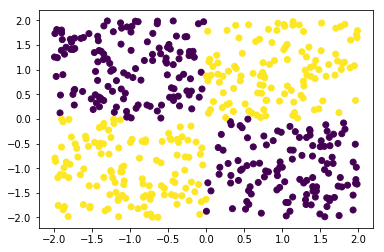

In [5]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)


### 3.4 Fit gradient descent to the network

In [705]:
np.random.seed(12345)
def grad_descent(x, y, starting_point=None, iterations=10, learning_rate=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=13).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x,point))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        #print("grad:",grad[0], grad[1], grad[2])
        trajectory.append(point)
        losses.append(loss(y, yhat(x,point)))
    return (np.array(trajectory), losses)


In [706]:
traj, losses = grad_descent(x, y, iterations=500,learning_rate=1e-1)

Text(0.5, 0, 'Iteration')

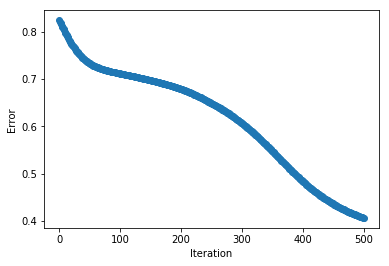

In [707]:
plt.plot(losses,'o')
plt.ylabel("Error")
plt.xlabel("Iteration")

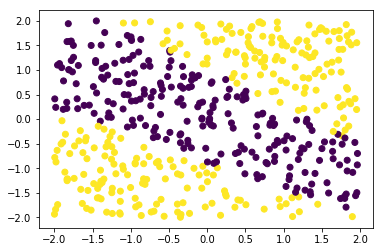

In [708]:
y_hat=[]
res = yhat(x,traj[-1])
for i in range(len(res)):
    if res[i]>0.5:
        y_hat.append(1)
    else:
        y_hat.append(0)
plt.scatter(x[:,0],x[:,1],c=y_hat)

### 3.5 With momentum

In [21]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=0.1):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=13).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x,point))]
    v = np.zeros(point.size)


    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x,point)))
    return (np.array(trajectory), losses)

Text(0.5, 0, 'Iteration')

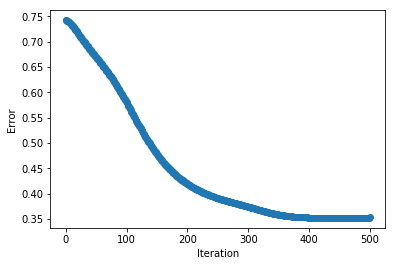

In [24]:
traj, losses = grad_descent_with_momentum(x, y, iterations=500, epsilon=0.01, alpha=.9)
plt.plot(losses,'o')
plt.ylabel("Error")
plt.xlabel("Iteration")

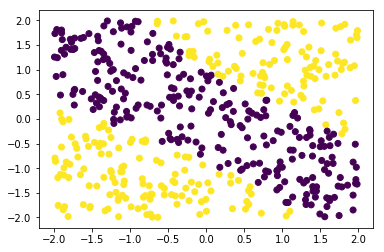

In [25]:
y_hat=[]
res = yhat(x,traj[-1])
for i in range(len(res)):
    if res[i]>0.5:
        y_hat.append(1)
    else:
        y_hat.append(0)
plt.scatter(x[:,0],x[:,1],c=y_hat)


From the error plot we could see the error with momentum are converging smallerthan the previous one.

### 3.6

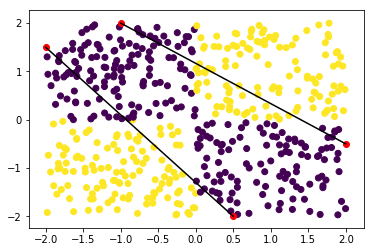

In [31]:
import matplotlib.pyplot as plt

xx=[-2 ,0.5 ,-1,2]
yy=[1.5, -2, 2,-0.5]

plt.plot(xx,yy, 'ro')

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

connectpoints(xx,yy,0,1)
connectpoints(xx,yy,2,3)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()